<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ViscosityOfFluids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Viscosity of Fluids
#@markdown The viscosity of a fluid is a measure of its resistance to deformation at a given rate. For liquids, it corresponds to the informal concept of "thickness": for example, syrup has a higher viscosity than water.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

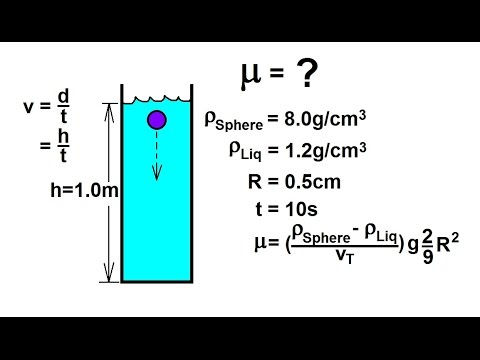

In [4]:
#@title  Introduction to Viscosity
#@markdown What is viscosity?
from IPython.display import YouTubeVideo
YouTubeVideo('Q7VZh0dI35M', width=600, height=400)

## Viscosity of gases
The viscosity of a gas can be thought of as a measure of its resistance to flow and is measured in the CGS unit Poise = dyne sec/cm2. The viscosity of gases near room temperature are in the centiPoise range, so that is a commonly used unit. Gas viscosity is only weakly dependent on pressure near atmospheric pressure.

https://en.wikipedia.org/wiki/Viscosity_models_for_mixtures

In [18]:
#@title Selecting viscosity models for gas mixtures in NeqSim
#@markdown The following script calcluates the viscosity of methane/ethane using SRK in NeqSim using different methods for viscosity calculation.

fluid1 = fluid('srk')
fluid1.addComponent('methane', 0.5)
fluid1.addComponent('ethane', 0.5)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(42.0, 'bara')
TPflash(fluid1)

method = "friction theory"
fluid1.getPhase('gas').getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("gas viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

method = "LBC"
fluid1.getPhase('gas').getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("gas viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

method = "PFCT"
fluid1.getPhase('gas').getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("gas viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

method = "PFCT-Heavy-Oil"
fluid1.getPhase('gas').getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("gas viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

method = "polynom"
fluid1.getPhase('gas').getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("gas viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

methane viscosity  0.011123455701169816  cP   metod:  friction theory
methane viscosity  0.011460928467152952  cP   metod:  LBC
methane viscosity  0.011848511832603428  cP   metod:  PFCT
methane viscosity  0.011848511832603428  cP   metod:  PFCT-Heavy-Oil
methane viscosity  0.09117303370997942  cP   metod:  polynom


In [29]:
#@title Selecting viscosity models for oil mixtures in NeqSim
#@markdown The following script calcluates the viscosity of methane/ethane using SRK in NeqSim using different methods for viscosity calculation.

fluid1 = fluid('srk')
fluid1.addComponent('n-heptane', 1.0)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(4.0, 'bara')
TPflash(fluid1)
fluid1.initProperties()
method = "friction theory"

fluid1.getPhase(0).getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("oil viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

method = "LBC"
fluid1.getPhase('oil').getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("oil viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

method = "PFCT"
fluid1.getPhase('oil').getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("oil viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

method = "PFCT-Heavy-Oil"
fluid1.getPhase('oil').getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("oil viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

method = "polynom"
fluid1.getPhase('oil').getPhysicalProperties().setViscosityModel(method)
fluid1.initProperties()
print("oil viscosity ", fluid1.getViscosity('cP'), " cP ", " metod: ", method)

oil viscosity  0.3936903160651968  cP   metod:  friction theory
oil viscosity  0.48626839717471015  cP   metod:  LBC
oil viscosity  0.43844268847553475  cP   metod:  PFCT
oil viscosity  0.43844268847553475  cP   metod:  PFCT-Heavy-Oil
oil viscosity  0.9189777392752309  cP   metod:  polynom
